In [115]:
import numpy as np
import matplotlib.pyplot as plt

class GP:
  def __init__(self, dim ):
    self.beta = 10.0
    self.dim = dim

  def k(self, xi, xj):
    return 1.0 * np.exp(-0.5 * 1.0 * np.sum((xi - xj) * (xi - xj), 2)) 

  def cov(self, xi, xj ):
    a = np.tile( xi.reshape(-1,1,self.dim), (1, len(xj), 1) )
    b = np.tile( xj.reshape(1,-1,self.dim), (len(xi), 1, 1) )
    return self.k(a,b)

  def learn(self, xt, yt ):
    self.xt = np.array(xt).reshape(-1,self.dim)
    self.yt = np.array(yt)
    N = len(xt)

    # カーネル行列を定義
    self.K = self.cov( self.xt, self.xt ) + np.eye(N, N)/self.beta
    self.K_inv = np.linalg.inv( self.K )
  
  def predict( self, x ):
    x = np.array(x).reshape(-1,self.dim)

    kx = self.cov( x, self.xt )
    k = self.cov(x, x) + 1.0/self.beta

    mu = kx@self.K_inv@self.yt.reshape(-1,1)
    sig = k - kx@self.K_inv@kx.T
    return mu.flatten(), sig

  def sample(self, x, num):
        mu, sig = self.predict(x)
        print(mu.shape, sig.shape)
        y = np.random.multivariate_normal(mu, sig, num)
        return y

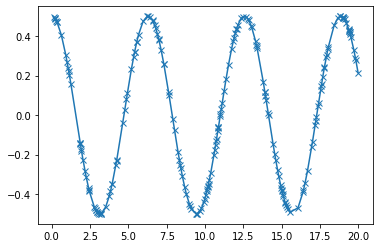

In [116]:
xt = np.sort(np.random.rand(200)*20)
yt = np.cos(xt)/2

plt.plot( xt, yt, "x-" )

In [117]:
gp = GP(1,)
gp.learn( xt.reshape((-1,1)), yt )

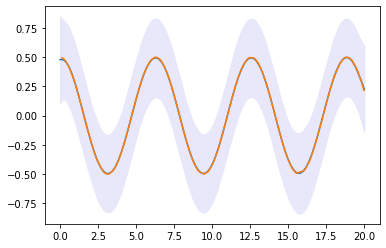

In [118]:
x = np.linspace( 0,20,100 )

mu, sigma = gp.predict( x.reshape(-1,1) )
plt.plot( x, mu )

y_max = mu.flatten() + np.sqrt(np.diag(sigma))
y_min = mu.flatten() - np.sqrt(np.diag(sigma))

plt.fill_between(x, y_min, y_max, facecolor="lavender" , alpha=0.9 , edgecolor="lavender"  )
plt.plot(xt, yt)
plt.show()

(100,) (100, 100)


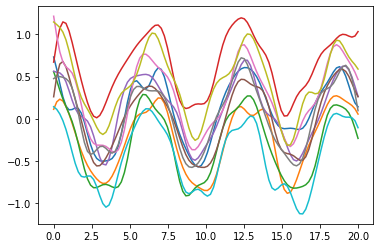

In [121]:
num = 10
y = gp.sample( x, num )

for i in range(num):
    plt.plot(x, y[i])
plt.show()